# SET UP

In [1]:
%pip install ipython
%pip install seaborn
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#%pip install beautifulsoup4 #Didn't used

In [3]:
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [4]:
 !pip install fastf1  #gives lap timing,car telemetry,position,tyre data,weather data,the event schedule and session

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import fastf1 as ff1
from fastf1 import plotting #team names and colors
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.max_columns', None)

In [264]:
import collections
from functools import cached_property
import logging
import warnings

In [265]:
import fastf1
from fastf1 import api, ergast
from fastf1.utils import recursive_dict_get, to_timedelta

In [248]:
import requests as req

from bs4 import BeautifulSoup as bs

In [249]:
import time

In [250]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [251]:
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

In [10]:
PATH=ChromeDriverManager().install()   # instalation in driver

driver=webdriver.Chrome(PATH)         # open in chrome

driver.get('https://www.google.es')

logger         INFO 	====== WebDriver manager ======
logger         INFO 	Get LATEST chromedriver version for google-chrome 107.0.5304
logger         INFO 	Driver [/Users/juliasabatel/.wdm/drivers/chromedriver/mac64/107.0.5304/chromedriver] found in cache


In [11]:
ff1.Cache.enable_cache('./cache/')

In [12]:
plotting.setup_mpl()

In [13]:
#data importation: 1st method:download csv

In [39]:
circuits = pd.read_csv('./f1_database/circuits.csv', encoding='latin1')
circuits2 = circuits.copy() 

In [40]:
constructor_results = pd.read_csv('./f1_database/constructor_results.csv', encoding='latin1')
constructor_results2 = constructor_results.copy() 

In [41]:
constructor_standings = pd.read_csv('./f1_database/constructor_standings.csv', encoding='latin1')
constructor_standings2 = constructor_standings.copy() 

In [42]:
constructors = pd.read_csv('./f1_database/constructors.csv', encoding='latin1')
constructors2 = constructors.copy() 

In [43]:
driver_standings = pd.read_csv('./f1_database/driver_standings.csv', encoding='latin1')
driver_standings2 = driver_standings.copy() 

In [44]:
drivers = pd.read_csv('./f1_database/drivers.csv', encoding='latin1')
drivers2 = drivers.copy() 

In [45]:
lap_times = pd.read_csv('./f1_database/lap_times.csv', encoding='latin1')
lap_times2 = lap_times.copy() 

In [46]:
pit_stops = pd.read_csv('./f1_database/pit_stops.csv', encoding='latin1')
pit_stops2 = pit_stops.copy() 

In [47]:
races = pd.read_csv('./f1_database/races.csv', encoding='latin1')
races2 = races.copy() 

In [48]:
results = pd.read_csv('./f1_database/results.csv', encoding='latin1')
results2 = results.copy() 

In [49]:
seasons = pd.read_csv('./f1_database/seasons.csv', encoding='latin1')
seasons2 = seasons.copy() 

In [50]:
sprint_results= pd.read_csv('./f1_database/sprint_results.csv', encoding='latin1')
sprint_results2 = sprint_results.copy() 

In [51]:
status = pd.read_csv('./f1_database/status.csv', encoding='latin1')
status2 = status.copy() 

# SCRAPING

In [52]:
url='https://es.motorsport.com/f1/results/2021/gp-de-abu-dhabi-483612/?st=GRID' #segundo método:Selenium

In [53]:
driver=webdriver.Chrome(PATH)

driver.get(url)

In [54]:
tabla=driver.find_element(By.TAG_NAME, 'tbody') #Se obtienen los elementos de la tabla

filas=tabla.find_elements(By.TAG_NAME, 'tr')


data=[]


for f in filas:
    
    elemen=f.find_elements(By.TAG_NAME, 'td')
    
    tmp=[]
    
    for e in elemen:
        
        tmp.append(e.text)
        
    data.append(tmp)

    
data

[['1',
  '33',
  'Max Verstappen',
  '',
  'Red Bull',
  'Honda',
  "1'22.109",
  '',
  '231.541'],
 ['2',
  '44',
  'Lewis Hamilton',
  '',
  'Mercedes',
  'Mercedes',
  "1'22.480",
  '0.371',
  '230.499'],
 ['3',
  '4',
  'Lando Norris',
  '',
  'McLaren',
  'Mercedes',
  "1'22.931",
  '0.822',
  '229.245'],
 ['4',
  '11',
  'Sergio Pérez',
  '',
  'Red Bull',
  'Honda',
  "1'22.947",
  '0.838',
  '229.201'],
 ['5',
  '55',
  'Carlos Sainz Jr.',
  '',
  'Ferrari',
  'Ferrari',
  "1'22.992",
  '0.883',
  '229.077'],
 ['6',
  '77',
  'Valtteri Bottas',
  '',
  'Mercedes',
  'Mercedes',
  "1'23.036",
  '0.927',
  '228.956'],
 ['7',
  '16',
  'Charles Leclerc',
  '',
  'Ferrari',
  'Ferrari',
  "1'23.122",
  '1.013',
  '228.719'],
 ['8',
  '22',
  'Yuki Tsunoda',
  '',
  'AlphaTauri',
  'Honda',
  "1'23.220",
  '1.111',
  '228.449'],
 ['9',
  '31',
  'Esteban Ocon',
  '',
  'Alpine',
  'Renault',
  "1'23.389",
  '1.280',
  '227.986'],
 ['10',
  '3',
  'Daniel Ricciardo',
  '',
  'McLaren

In [67]:
data=[[e.text for e in f.find_elements(By.TAG_NAME, 'td')] 
      for f in tabla.find_elements(By.TAG_NAME, 'tr')]

data

[['1',
  '33',
  'Max Verstappen',
  '',
  'Red Bull',
  'Honda',
  "1'22.109",
  '',
  '231.541'],
 ['2',
  '44',
  'Lewis Hamilton',
  '',
  'Mercedes',
  'Mercedes',
  "1'22.480",
  '0.371',
  '230.499'],
 ['3',
  '4',
  'Lando Norris',
  '',
  'McLaren',
  'Mercedes',
  "1'22.931",
  '0.822',
  '229.245'],
 ['4',
  '11',
  'Sergio Pérez',
  '',
  'Red Bull',
  'Honda',
  "1'22.947",
  '0.838',
  '229.201'],
 ['5',
  '55',
  'Carlos Sainz Jr.',
  '',
  'Ferrari',
  'Ferrari',
  "1'22.992",
  '0.883',
  '229.077'],
 ['6',
  '77',
  'Valtteri Bottas',
  '',
  'Mercedes',
  'Mercedes',
  "1'23.036",
  '0.927',
  '228.956'],
 ['7',
  '16',
  'Charles Leclerc',
  '',
  'Ferrari',
  'Ferrari',
  "1'23.122",
  '1.013',
  '228.719'],
 ['8',
  '22',
  'Yuki Tsunoda',
  '',
  'AlphaTauri',
  'Honda',
  "1'23.220",
  '1.111',
  '228.449'],
 ['9',
  '31',
  'Esteban Ocon',
  '',
  'Alpine',
  'Renault',
  "1'23.389",
  '1.280',
  '227.986'],
 ['10',
  '3',
  'Daniel Ricciardo',
  '',
  'McLaren

In [68]:
cabeceras=driver.find_element(By.TAG_NAME, 'thead') #extraemos las cabeceras

cabeceras=[c.text for c in cabeceras.find_elements(By.TAG_NAME, 'th')]

driver.quit()

cabeceras

['Cla', '#', 'Piloto', '', 'Chasis', 'Motor', 'Tiempo', 'Diferencia', 'Km/h']

In [69]:
df_starting_grid=pd.DataFrame(data, columns=cabeceras)

df_starting_grid #parrilla de salida

,Cla,#,Piloto,,Chasis,Motor,Tiempo,Diferencia,Km/h
0,1,33,Max Verstappen,,Red Bull,Honda,1'22.109,,231.541
1,2,44,Lewis Hamilton,,Mercedes,Mercedes,1'22.480,0.371,230.499
2,3,4,Lando Norris,,McLaren,Mercedes,1'22.931,0.822,229.245
3,4,11,Sergio Pérez,,Red Bull,Honda,1'22.947,0.838,229.201
4,5,55,Carlos Sainz Jr.,,Ferrari,Ferrari,1'22.992,0.883,229.077
5,6,77,Valtteri Bottas,,Mercedes,Mercedes,1'23.036,0.927,228.956
6,7,16,Charles Leclerc,,Ferrari,Ferrari,1'23.122,1.013,228.719
7,8,22,Yuki Tsunoda,,AlphaTauri,Honda,1'23.220,1.111,228.449
8,9,31,Esteban Ocon,,Alpine,Renault,1'23.389,1.280,227.986
9,10,3,Daniel Ricciardo,,McLaren,Mercedes,1'23.409,1.300,227.932


In [70]:
#extracción 3º fuente información: duración de los pits stop

In [71]:
abu_dhabi_race = ff1.get_session(2021, 'Abu Dhabi', 'R')
print(abu_dhabi_race .date) #para encontrar el dia exacto de la carrera y buscar info

2021-12-12 00:00:00


In [ ]:
#url1='https://www.formula1.com/en/results.html/2021/races/1107/abu-dhabi/pit-stop-summary.html'#tercera fuente de informacion


In [ ]:
#driver=webdriver.Chrome(PATH)

#driver.get(url1)

In [ ]:
#tabla2=driver.find_element(By.TAG_NAME, 'tbody') #Se obtienen los elementos de la tabla

#filas2=tabla2.find_elements(By.TAG_NAME, 'tr')

#time.sleep(3)

#data2=[]


#for f in filas2:
    
    #elemen=f.find_elements(By.TAG_NAME, 'td')
    
    #tmp2=[]
    
    #for e in elemen:
        
        #tmp2.append(e.text)
        
    #data2.append(tmp)

    
#data2

In [ ]:
#cabeceras2=driver.find_element(By.TAG_NAME, 'thead') #extraemos las cabeceras

#cabeceras2=[c.text for c in cabeceras2.find_elements(By.TAG_NAME, 'th')]

#driver.quit()

#cabeceras2

In [72]:
df_pit_stop=pd.read_clipboard()
df_pit_stop #pits stop

,POS,NO,DRIVER,CAR,TIME,GAP,LAPS
0,1,33,Max Verstappen,RED BULL RACING HONDA,1:25.009,NaN,23
1,2,77,Valtteri Bottas,MERCEDES,1:25.205,+0.196s,27
2,3,44,Lewis Hamilton,MERCEDES,1:25.355,+0.346s,25
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:25.363,+0.354s,24
4,5,22,Yuki Tsunoda,ALPHATAURI HONDA,1:25.378,+0.369s,23
5,6,14,Fernando Alonso,ALPINE RENAULT,1:25.625,+0.616s,26
6,7,10,Pierre Gasly,ALPHATAURI HONDA,1:25.822,+0.813s,28
7,8,16,Charles Leclerc,FERRARI,1:25.846,+0.837s,20
8,9,55,Carlos Sainz,FERRARI,1:25.886,+0.877s,26
9,10,5,Sebastian Vettel,ASTON MARTIN MERCEDES,1:26.007,+0.998s,26


In [73]:
df_pit_stop.to_excel('../Desktop/arc.xlsx')

In [74]:
#df_pit_stops=pd.DataFrame(data2, columns=cabeceras2)

#df_pit_stops #pits stop

In [75]:
#Cumplido: 3 fuentes de información y 2 métodos de extracción. Seguimos obteniendo información relevante

In [92]:
url3 = 'https://www.formula1.com/en/results.html/2021/races/1107/abu-dhabi/fastest-laps.html'

In [93]:
driver=webdriver.Chrome(PATH)

driver.get(url3)

In [85]:
tabla3=driver.find_element(By.TAG_NAME, 'tbody') #Se obtienen los elementos de la tabla

time.sleep(2)

filas3=tabla3.find_elements(By.TAG_NAME, 'tr')

time.sleep(1)

data3=[]


for f in filas3:
    
    time.sleep(3) #duerme, esperas aqui 3 seg
    
    elemen=f.find_elements(By.TAG_NAME, 'td')
    
    tmp3=[]
    
    for e in elemen:
        
        tmp3.append(e.text)
        
    data3.append(tmp3)

    
data3

[['',
  '1',
  '33',
  'Max Verstappen',
  'RED BULL RACING HONDA',
  '39',
  '18:02:08',
  '1:26.103',
  '220.800',
  ''],
 ['',
  '2',
  '11',
  'Sergio Perez',
  'RED BULL RACING HONDA',
  '51',
  '18:19:56',
  '1:26.419',
  '219.993',
  ''],
 ['',
  '3',
  '44',
  'Lewis Hamilton',
  'MERCEDES',
  '43',
  '18:07:40',
  '1:26.615',
  '219.495',
  ''],
 ['',
  '4',
  '4',
  'Lando Norris',
  'MCLAREN MERCEDES',
  '58',
  '18:34:38',
  '1:26.762',
  '219.123',
  ''],
 ['',
  '5',
  '77',
  'Valtteri Bottas',
  'MERCEDES',
  '51',
  '18:20:28',
  '1:26.862',
  '218.871',
  ''],
 ['',
  '6',
  '10',
  'Pierre Gasly',
  'ALPHATAURI HONDA',
  '49',
  '18:17:43',
  '1:27.342',
  '217.668',
  ''],
 ['',
  '7',
  '22',
  'Yuki Tsunoda',
  'ALPHATAURI HONDA',
  '50',
  '18:19:08',
  '1:27.496',
  '217.285',
  ''],
 ['',
  '8',
  '14',
  'Fernando Alonso',
  'ALPINE RENAULT',
  '58',
  '18:34:40',
  '1:27.607',
  '217.010',
  ''],
 ['',
  '9',
  '55',
  'Carlos Sainz',
  'FERRARI',
  '51',
  '

In [79]:
cabeceras3=driver.find_element(By.TAG_NAME, 'thead') #extraemos las cabeceras

cabeceras3=[c.text for c in cabeceras3.find_elements(By.TAG_NAME, 'th')]

driver.quit()

cabeceras3

['',
 'POS',
 'NO',
 'DRIVER',
 'CAR',
 'LAP',
 'TIME OF DAY',
 'TIME',
 'AVG SPEED',
 '']

In [86]:
df_race_results=pd.DataFrame(data3, columns=cabeceras3)

df_race_results #resultados de la carrera

,,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,39,18:02:08,1:26.103,220.800,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,51,18:19:56,1:26.419,219.993,
2,,3,44,Lewis Hamilton,MERCEDES,43,18:07:40,1:26.615,219.495,
3,,4,4,Lando Norris,MCLAREN MERCEDES,58,18:34:38,1:26.762,219.123,
4,,5,77,Valtteri Bottas,MERCEDES,51,18:20:28,1:26.862,218.871,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,49,18:17:43,1:27.342,217.668,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,50,18:19:08,1:27.496,217.285,
7,,8,14,Fernando Alonso,ALPINE RENAULT,58,18:34:40,1:27.607,217.010,
8,,9,55,Carlos Sainz,FERRARI,51,18:20:24,1:27.618,216.982,
9,,10,31,Esteban Ocon,ALPINE RENAULT,58,18:34:43,1:28.249,215.431,


In [94]:
url5='https://www.formula1.com/en/results.html/2021/races/1107/abu-dhabi/fastest-laps.html'

In [95]:
driver=webdriver.Chrome(PATH)

driver.get(url5)

In [96]:
tabla5=driver.find_element(By.TAG_NAME, 'tbody') #Se obtienen los elementos de la tabla

time.sleep(3)

filas5=tabla5.find_elements(By.TAG_NAME, 'tr')

time.sleep(3)

data5=[]


for f in filas5:
    
    time.sleep(3) #duerme, esperas aqui 3 seg
    
    elemen=f.find_elements(By.TAG_NAME, 'td')
    
    tmp5=[]
    
    for e in elemen:
        
        tmp5.append(e.text)
        
    data5.append(tmp5)
    
data5

[['',
  '1',
  '33',
  'Max Verstappen',
  'RED BULL RACING HONDA',
  '39',
  '18:02:08',
  '1:26.103',
  '220.800',
  ''],
 ['',
  '2',
  '11',
  'Sergio Perez',
  'RED BULL RACING HONDA',
  '51',
  '18:19:56',
  '1:26.419',
  '219.993',
  ''],
 ['',
  '3',
  '44',
  'Lewis Hamilton',
  'MERCEDES',
  '43',
  '18:07:40',
  '1:26.615',
  '219.495',
  ''],
 ['',
  '4',
  '4',
  'Lando Norris',
  'MCLAREN MERCEDES',
  '58',
  '18:34:38',
  '1:26.762',
  '219.123',
  ''],
 ['',
  '5',
  '77',
  'Valtteri Bottas',
  'MERCEDES',
  '51',
  '18:20:28',
  '1:26.862',
  '218.871',
  ''],
 ['',
  '6',
  '10',
  'Pierre Gasly',
  'ALPHATAURI HONDA',
  '49',
  '18:17:43',
  '1:27.342',
  '217.668',
  ''],
 ['',
  '7',
  '22',
  'Yuki Tsunoda',
  'ALPHATAURI HONDA',
  '50',
  '18:19:08',
  '1:27.496',
  '217.285',
  ''],
 ['',
  '8',
  '14',
  'Fernando Alonso',
  'ALPINE RENAULT',
  '58',
  '18:34:40',
  '1:27.607',
  '217.010',
  ''],
 ['',
  '9',
  '55',
  'Carlos Sainz',
  'FERRARI',
  '51',
  '

In [97]:
cabeceras5=driver.find_element(By.TAG_NAME, 'thead') #extraemos las cabeceras

cabeceras5=[c.text for c in cabeceras5.find_elements(By.TAG_NAME, 'th')]

driver.quit()

cabeceras5

['',
 'POS',
 'NO',
 'DRIVER',
 'CAR',
 'LAP',
 'TIME OF DAY',
 'TIME',
 'AVG SPEED',
 '']

In [124]:
df_fastest_lap=pd.DataFrame(data5, columns=cabeceras5)

df_fastest_lap #vuelta rápida

,,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,39,18:02:08,1:26.103,220.800,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,51,18:19:56,1:26.419,219.993,
2,,3,44,Lewis Hamilton,MERCEDES,43,18:07:40,1:26.615,219.495,
3,,4,4,Lando Norris,MCLAREN MERCEDES,58,18:34:38,1:26.762,219.123,
4,,5,77,Valtteri Bottas,MERCEDES,51,18:20:28,1:26.862,218.871,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,49,18:17:43,1:27.342,217.668,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,50,18:19:08,1:27.496,217.285,
7,,8,14,Fernando Alonso,ALPINE RENAULT,58,18:34:40,1:27.607,217.010,
8,,9,55,Carlos Sainz,FERRARI,51,18:20:24,1:27.618,216.982,
9,,10,31,Esteban Ocon,ALPINE RENAULT,58,18:34:43,1:28.249,215.431,


In [99]:
#no funciona una de las tablas, escrapeo otra con la misma información

In [20]:
GRID_STARTING=pd.read_clipboard()
GRID_STARTING 

,POS,NO,DRIVER,CAR,TIME
0,1,33,Max Verstappen,RED BULL RACING HONDA,1:22.109
1,2,44,Lewis Hamilton,MERCEDES,1:22.480
2,3,4,Lando Norris,MCLAREN MERCEDES,1:22.931
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:22.947
4,5,55,Carlos Sainz,FERRARI,1:22.992
5,6,77,Valtteri Bottas,MERCEDES,1:23.036
6,7,16,Charles Leclerc,FERRARI,1:23.122
7,8,22,Yuki Tsunoda,ALPHATAURI HONDA,1:23.220
8,9,31,Esteban Ocon,ALPINE RENAULT,1:23.389
9,10,3,Daniel Ricciardo,MCLAREN MERCEDES,1:23.409


In [21]:
GRID_STARTING.to_excel('../Desktop/GRID_STARTING.xlsx')

In [23]:
GRID_STARTING.to_csv('../Desktop/GRID_STARTING.csv')

In [27]:
QUALIFYING=pd.read_clipboard()
QUALIFYING

,POS,NO,DRIVER,CAR,Q1,Q2,Q3,LAPS
0,1,33,Max Verstappen,RED BULL RACING HONDA,1:23.322,1:22.800,1:22.109,20
1,2,44,Lewis Hamilton,MERCEDES,1:22.845,1:23.145,1:22.480,19
2,3,4,Lando Norris,MCLAREN MERCEDES,1:23.553,1:23.256,1:22.931,20
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:23.350,1:23.135,1:22.947,24
4,5,55,Carlos Sainz,FERRARI,1:23.624,1:23.174,1:22.992,22
5,6,77,Valtteri Bottas,MERCEDES,1:23.117,1:23.246,1:23.036,20
6,7,16,Charles Leclerc,FERRARI,1:23.467,1:23.202,1:23.122,23
7,8,22,Yuki Tsunoda,ALPHATAURI HONDA,1:23.428,1:23.404,1:23.220,22
8,9,31,Esteban Ocon,ALPINE RENAULT,1:23.764,1:23.420,1:23.389,20
9,10,3,Daniel Ricciardo,MCLAREN MERCEDES,1:23.829,1:23.448,1:23.409,19


In [31]:
QUALIFYING.to_excel('../Desktop/QUALIFYING.xlsx')

In [29]:
QUALIFYING.to_csv('../Desktop/QUALIFYING.csv')

In [32]:
PRACTICE3=pd.read_clipboard()
PRACTICE3

,POS,NO,DRIVER,CAR,TIME,GAP,LAPS
0,1,44,Lewis Hamilton,MERCEDES,1:23.274,NaN,23
1,2,33,Max Verstappen,RED BULL RACING HONDA,1:23.488,+0.214s,23
2,3,77,Valtteri Bottas,MERCEDES,1:24.025,+0.751s,21
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:24.047,+0.773s,21
4,5,4,Lando Norris,MCLAREN MERCEDES,1:24.106,+0.832s,17
5,6,22,Yuki Tsunoda,ALPHATAURI HONDA,1:24.223,+0.949s,22
6,7,10,Pierre Gasly,ALPHATAURI HONDA,1:24.251,+0.977s,22
7,8,55,Carlos Sainz,FERRARI,1:24.595,+1.321s,20
8,9,3,Daniel Ricciardo,MCLAREN MERCEDES,1:24.733,+1.459s,16
9,10,16,Charles Leclerc,FERRARI,1:24.758,+1.484s,21


In [33]:
PRACTICE3.to_excel('../Desktop/PRACTICE3.xlsx')

In [34]:
PRACTICE2=pd.read_clipboard()
PRACTICE2

,POS,NO,DRIVER,CAR,TIME,GAP,LAPS
0,1,44,Lewis Hamilton,MERCEDES,1:23.691,NaN,26
1,2,31,Esteban Ocon,ALPINE RENAULT,1:24.034,+0.343s,29
2,3,77,Valtteri Bottas,MERCEDES,1:24.083,+0.392s,29
3,4,33,Max Verstappen,RED BULL RACING HONDA,1:24.332,+0.641s,25
4,5,11,Sergio Perez,RED BULL RACING HONDA,1:24.400,+0.709s,26
5,6,14,Fernando Alonso,ALPINE RENAULT,1:24.495,+0.804s,27
6,7,22,Yuki Tsunoda,ALPHATAURI HONDA,1:24.532,+0.841s,26
7,8,16,Charles Leclerc,FERRARI,1:24.557,+0.866s,29
8,9,55,Carlos Sainz,FERRARI,1:24.844,+1.153s,29
9,10,10,Pierre Gasly,ALPHATAURI HONDA,1:24.940,+1.249s,27


In [ ]:
PRACTICE2.to_excel('../Desktop/PRACTICE2.xlsx')

In [35]:
PRACTICE1=pd.read_clipboard()
PRACTICE1

,POS,NO,DRIVER,CAR,TIME,GAP,LAPS
0,1,33,Max Verstappen,RED BULL RACING HONDA,1:25.009,NaN,23
1,2,77,Valtteri Bottas,MERCEDES,1:25.205,+0.196s,27
2,3,44,Lewis Hamilton,MERCEDES,1:25.355,+0.346s,25
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:25.363,+0.354s,24
4,5,22,Yuki Tsunoda,ALPHATAURI HONDA,1:25.378,+0.369s,23
5,6,14,Fernando Alonso,ALPINE RENAULT,1:25.625,+0.616s,26
6,7,10,Pierre Gasly,ALPHATAURI HONDA,1:25.822,+0.813s,28
7,8,16,Charles Leclerc,FERRARI,1:25.846,+0.837s,20
8,9,55,Carlos Sainz,FERRARI,1:25.886,+0.877s,26
9,10,5,Sebastian Vettel,ASTON MARTIN MERCEDES,1:26.007,+0.998s,26


In [36]:
PRACTICE1.to_excel('../Desktop/PRACTICE1.xlsx')

In [192]:
INFOR=pd.read_clipboard()
INFOR

,POS,NO,DRIVER,CAR,LAPS,TIME/RETIRED,PTS
0,1,33,Max Verstappen,RED BULL RACING HONDA,58,1:30:17.345,26
1,2,44,Lewis Hamilton,MERCEDES,58,+2.256s,18
2,3,55,Carlos Sainz,FERRARI,58,+5.173s,15
3,4,22,Yuki Tsunoda,ALPHATAURI HONDA,58,+5.692s,12
4,5,10,Pierre Gasly,ALPHATAURI HONDA,58,+6.531s,10
5,6,77,Valtteri Bottas,MERCEDES,58,+7.463s,8
6,7,4,Lando Norris,MCLAREN MERCEDES,58,+59.200s,6
7,8,14,Fernando Alonso,ALPINE RENAULT,58,+61.708s,4
8,9,31,Esteban Ocon,ALPINE RENAULT,58,+64.026s,2
9,10,16,Charles Leclerc,FERRARI,58,+66.057s,1


In [193]:
INFOR.to_excel('../Desktop/INFOR.xlsx')

# EXPLORATION AND CLEANING

In [ ]:
#df_parrilla_salida : GRID_STARTING
#df_pit_stop : PIT STOP
#df_race_results : RACE_RESULTS
#fastest_lap : FASTEST_LAP
#QUALIFYING
#PRACTICE3
#PRACTICE2
#PRACTICE1



#Mismo nombres de columnas

In [87]:
df_starting_grid.columns#no null values or duplicated

Index(['Cla', '#', 'Piloto', '', 'Chasis', 'Motor', 'Tiempo', 'Diferencia',
       'Km/h'],
      dtype='object')

In [88]:
STARTING_GRID= df_starting_grid.rename(columns={'Cla':'STARTING_POSITION',
                                   '#':'NO','Piloto':'DRIVER','Chasis':'CHASIS','Motor':'MOTOR','Tiempo':'GRID_TIME','Diferencia':'GRID_DIFERENCE','Km/h':'KM/H'})
STARTING_GRID

,STARTING_POSITION,NO,DRIVER,,CHASIS,MOTOR,GRID_TIME,GRID_DIFERENCE,KM/H
0,1,33,Max Verstappen,,Red Bull,Honda,1'22.109,,231.541
1,2,44,Lewis Hamilton,,Mercedes,Mercedes,1'22.480,0.371,230.499
2,3,4,Lando Norris,,McLaren,Mercedes,1'22.931,0.822,229.245
3,4,11,Sergio Pérez,,Red Bull,Honda,1'22.947,0.838,229.201
4,5,55,Carlos Sainz Jr.,,Ferrari,Ferrari,1'22.992,0.883,229.077
5,6,77,Valtteri Bottas,,Mercedes,Mercedes,1'23.036,0.927,228.956
6,7,16,Charles Leclerc,,Ferrari,Ferrari,1'23.122,1.013,228.719
7,8,22,Yuki Tsunoda,,AlphaTauri,Honda,1'23.220,1.111,228.449
8,9,31,Esteban Ocon,,Alpine,Renault,1'23.389,1.280,227.986
9,10,3,Daniel Ricciardo,,McLaren,Mercedes,1'23.409,1.300,227.932


In [ ]:
df_pit_stop

In [100]:
PIT_STOP= df_pit_stop.rename(columns={'STOPS':'PIT_STOPS',
                                   'LAP':'PIT_STOP_LAP','TIME OF DAY':'PIT_STOP_TIME','TOTAL':'PIT_STOP_TOTAL_DURATION','TIME':'PIT_STOP_DURATION'})
PIT_STOP

,POS,NO,DRIVER,CAR,PIT_STOP_DURATION,GAP,LAPS
0,1,33,Max Verstappen,RED BULL RACING HONDA,1:25.009,NaN,23
1,2,77,Valtteri Bottas,MERCEDES,1:25.205,+0.196s,27
2,3,44,Lewis Hamilton,MERCEDES,1:25.355,+0.346s,25
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:25.363,+0.354s,24
4,5,22,Yuki Tsunoda,ALPHATAURI HONDA,1:25.378,+0.369s,23
5,6,14,Fernando Alonso,ALPINE RENAULT,1:25.625,+0.616s,26
6,7,10,Pierre Gasly,ALPHATAURI HONDA,1:25.822,+0.813s,28
7,8,16,Charles Leclerc,FERRARI,1:25.846,+0.837s,20
8,9,55,Carlos Sainz,FERRARI,1:25.886,+0.877s,26
9,10,5,Sebastian Vettel,ASTON MARTIN MERCEDES,1:26.007,+0.998s,26


In [101]:
PIT_STOP.drop(['DRIVER','CAR'], axis=1)

,POS,NO,PIT_STOP_DURATION,GAP,LAPS
0,1,33,1:25.009,NaN,23
1,2,77,1:25.205,+0.196s,27
2,3,44,1:25.355,+0.346s,25
3,4,11,1:25.363,+0.354s,24
4,5,22,1:25.378,+0.369s,23
5,6,14,1:25.625,+0.616s,26
6,7,10,1:25.822,+0.813s,28
7,8,16,1:25.846,+0.837s,20
8,9,55,1:25.886,+0.877s,26
9,10,5,1:26.007,+0.998s,26


In [ ]:
df_race_results

In [102]:
RACE_RESULTS=df_race_results.drop(['LAP', 'TIME OF DAY','TIME','AVG SPEED'], axis=1) #eliminate useless columns

In [103]:
RACE_RESULTS

,,POS,NO,DRIVER,CAR,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,
2,,3,44,Lewis Hamilton,MERCEDES,
3,,4,4,Lando Norris,MCLAREN MERCEDES,
4,,5,77,Valtteri Bottas,MERCEDES,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,
7,,8,14,Fernando Alonso,ALPINE RENAULT,
8,,9,55,Carlos Sainz,FERRARI,
9,,10,31,Esteban Ocon,ALPINE RENAULT,


In [104]:
RACE_RESULTS.drop(['DRIVER'], axis=1)

,,POS,NO,CAR,
0,,1,33,RED BULL RACING HONDA,
1,,2,11,RED BULL RACING HONDA,
2,,3,44,MERCEDES,
3,,4,4,MCLAREN MERCEDES,
4,,5,77,MERCEDES,
5,,6,10,ALPHATAURI HONDA,
6,,7,22,ALPHATAURI HONDA,
7,,8,14,ALPINE RENAULT,
8,,9,55,FERRARI,
9,,10,31,ALPINE RENAULT,


In [123]:
fastest_lap

NameError: name 'fastest_lap' is not defined

In [122]:
FASTEST_LAP= fastest_lap.rename(columns={'TIME':'FINISH_TIME','LAP':'FASTEST_LAP','AVG SPEED':'AVG_SPEED','TIME OF DAY':'TIME_OF_DAY'})
FASTEST_LAP

NameError: name 'fastest_lap' is not defined

In [107]:
FASTEST_LAP.drop(['DRIVER','CAR'], axis=1)

NameError: name 'FASTEST_LAP' is not defined

In [108]:
GRID_STARTING

,GRID_POSITION,NO
0,1,33
1,2,44
2,3,4
3,4,11
4,5,55
5,6,77
6,7,16
7,8,22
8,9,31
9,10,3


In [109]:
GRID_STARTING=GRID_STARTING.rename(columns={'POS':'GRID_POSITION'})
GRID_STARTING

,GRID_POSITION,NO
0,1,33
1,2,44
2,3,4
3,4,11
4,5,55
5,6,77
6,7,16
7,8,22
8,9,31
9,10,3


In [111]:
GRID_STARTING=GRID_STARTING.drop(['DRIVER','CAR','TIME'], axis=1)

KeyError: "['DRIVER', 'CAR', 'TIME'] not found in axis"

In [112]:
GRID_STARTING

,GRID_POSITION,NO
0,1,33
1,2,44
2,3,4
3,4,11
4,5,55
5,6,77
6,7,16
7,8,22
8,9,31
9,10,3


In [113]:
QUALIFYING

,NO,Q1,Q2,Q3
0,33,1:23.322,1:22.800,1:22.109
1,44,1:22.845,1:23.145,1:22.480
2,4,1:23.553,1:23.256,1:22.931
3,11,1:23.350,1:23.135,1:22.947
4,55,1:23.624,1:23.174,1:22.992
5,77,1:23.117,1:23.246,1:23.036
6,16,1:23.467,1:23.202,1:23.122
7,22,1:23.428,1:23.404,1:23.220
8,31,1:23.764,1:23.420,1:23.389
9,3,1:23.829,1:23.448,1:23.409


In [114]:
QUALIFYING=QUALIFYING.drop(['DRIVER','CAR','POS','LAPS'], axis=1)

KeyError: "['DRIVER', 'CAR', 'POS', 'LAPS'] not found in axis"

In [115]:
QUALIFYING

,NO,Q1,Q2,Q3
0,33,1:23.322,1:22.800,1:22.109
1,44,1:22.845,1:23.145,1:22.480
2,4,1:23.553,1:23.256,1:22.931
3,11,1:23.350,1:23.135,1:22.947
4,55,1:23.624,1:23.174,1:22.992
5,77,1:23.117,1:23.246,1:23.036
6,16,1:23.467,1:23.202,1:23.122
7,22,1:23.428,1:23.404,1:23.220
8,31,1:23.764,1:23.420,1:23.389
9,3,1:23.829,1:23.448,1:23.409


In [116]:
QUALIFYING.fillna('0', inplace=True)

In [117]:
QUALIFYING

,NO,Q1,Q2,Q3
0,33,1:23.322,1:22.800,1:22.109
1,44,1:22.845,1:23.145,1:22.480
2,4,1:23.553,1:23.256,1:22.931
3,11,1:23.350,1:23.135,1:22.947
4,55,1:23.624,1:23.174,1:22.992
5,77,1:23.117,1:23.246,1:23.036
6,16,1:23.467,1:23.202,1:23.122
7,22,1:23.428,1:23.404,1:23.220
8,31,1:23.764,1:23.420,1:23.389
9,3,1:23.829,1:23.448,1:23.409


In [127]:
FASTEST_LAP=df_fastest_lap

In [128]:
FASTEST_LAP

,,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,39,18:02:08,1:26.103,220.800,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,51,18:19:56,1:26.419,219.993,
2,,3,44,Lewis Hamilton,MERCEDES,43,18:07:40,1:26.615,219.495,
3,,4,4,Lando Norris,MCLAREN MERCEDES,58,18:34:38,1:26.762,219.123,
4,,5,77,Valtteri Bottas,MERCEDES,51,18:20:28,1:26.862,218.871,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,49,18:17:43,1:27.342,217.668,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,50,18:19:08,1:27.496,217.285,
7,,8,14,Fernando Alonso,ALPINE RENAULT,58,18:34:40,1:27.607,217.010,
8,,9,55,Carlos Sainz,FERRARI,51,18:20:24,1:27.618,216.982,
9,,10,31,Esteban Ocon,ALPINE RENAULT,58,18:34:43,1:28.249,215.431,


In [130]:
FASTEST_LAP=FASTEST_LAP.drop(['CAR','POS','DRIVER'], axis=1)
FASTEST_LAP

,,NO,LAP,TIME OF DAY,TIME,AVG SPEED,
0,,33,39,18:02:08,1:26.103,220.800,
1,,11,51,18:19:56,1:26.419,219.993,
2,,44,43,18:07:40,1:26.615,219.495,
3,,4,58,18:34:38,1:26.762,219.123,
4,,77,51,18:20:28,1:26.862,218.871,
5,,10,49,18:17:43,1:27.342,217.668,
6,,22,50,18:19:08,1:27.496,217.285,
7,,14,58,18:34:40,1:27.607,217.010,
8,,55,51,18:20:24,1:27.618,216.982,
9,,31,58,18:34:43,1:28.249,215.431,


In [132]:
FASTEST_LAP=FASTEST_LAP.rename(columns={'AVG SPEED':'AVG_SPEED','TIME OF DAY':'TIME_OF_DAY'})
FASTEST_LAP

,,NO,LAP,TIME_OF_DAY,TIME,AVG_SPEED,
0,,33,39,18:02:08,1:26.103,220.800,
1,,11,51,18:19:56,1:26.419,219.993,
2,,44,43,18:07:40,1:26.615,219.495,
3,,4,58,18:34:38,1:26.762,219.123,
4,,77,51,18:20:28,1:26.862,218.871,
5,,10,49,18:17:43,1:27.342,217.668,
6,,22,50,18:19:08,1:27.496,217.285,
7,,14,58,18:34:40,1:27.607,217.010,
8,,55,51,18:20:24,1:27.618,216.982,
9,,31,58,18:34:43,1:28.249,215.431,


In [133]:
RACE_RESULTS

,,POS,NO,DRIVER,CAR,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,
2,,3,44,Lewis Hamilton,MERCEDES,
3,,4,4,Lando Norris,MCLAREN MERCEDES,
4,,5,77,Valtteri Bottas,MERCEDES,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,
7,,8,14,Fernando Alonso,ALPINE RENAULT,
8,,9,55,Carlos Sainz,FERRARI,
9,,10,31,Esteban Ocon,ALPINE RENAULT,


In [135]:
PRACTICE3

,POS,NO,DRIVER,CAR,TIME,GAP,LAPS
0,1,44,Lewis Hamilton,MERCEDES,1:23.274,NaN,23
1,2,33,Max Verstappen,RED BULL RACING HONDA,1:23.488,+0.214s,23
2,3,77,Valtteri Bottas,MERCEDES,1:24.025,+0.751s,21
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:24.047,+0.773s,21
4,5,4,Lando Norris,MCLAREN MERCEDES,1:24.106,+0.832s,17
5,6,22,Yuki Tsunoda,ALPHATAURI HONDA,1:24.223,+0.949s,22
6,7,10,Pierre Gasly,ALPHATAURI HONDA,1:24.251,+0.977s,22
7,8,55,Carlos Sainz,FERRARI,1:24.595,+1.321s,20
8,9,3,Daniel Ricciardo,MCLAREN MERCEDES,1:24.733,+1.459s,16
9,10,16,Charles Leclerc,FERRARI,1:24.758,+1.484s,21


In [136]:
PRACTICE3=PRACTICE3.drop(['CAR','POS','DRIVER'], axis=1)
PRACTICE3

,NO,TIME,GAP,LAPS
0,44,1:23.274,NaN,23
1,33,1:23.488,+0.214s,23
2,77,1:24.025,+0.751s,21
3,11,1:24.047,+0.773s,21
4,4,1:24.106,+0.832s,17
5,22,1:24.223,+0.949s,22
6,10,1:24.251,+0.977s,22
7,55,1:24.595,+1.321s,20
8,3,1:24.733,+1.459s,16
9,16,1:24.758,+1.484s,21


In [137]:
PRACTICE3=PRACTICE3.rename(columns={'TIME':'TIME_PRACTICE3','GAP':'GAP_PRACTICE3','LAPS':'LAPS_PRACTICE3'})
PRACTICE3

,NO,TIME_PRACTICE3,GAP_PRACTICE3,LAPS_PRACTICE3
0,44,1:23.274,NaN,23
1,33,1:23.488,+0.214s,23
2,77,1:24.025,+0.751s,21
3,11,1:24.047,+0.773s,21
4,4,1:24.106,+0.832s,17
5,22,1:24.223,+0.949s,22
6,10,1:24.251,+0.977s,22
7,55,1:24.595,+1.321s,20
8,3,1:24.733,+1.459s,16
9,16,1:24.758,+1.484s,21


In [138]:
PRACTICE3.fillna('0', inplace=True)

In [139]:
PRACTICE3

,NO,TIME_PRACTICE3,GAP_PRACTICE3,LAPS_PRACTICE3
0,44,1:23.274,0,23
1,33,1:23.488,+0.214s,23
2,77,1:24.025,+0.751s,21
3,11,1:24.047,+0.773s,21
4,4,1:24.106,+0.832s,17
5,22,1:24.223,+0.949s,22
6,10,1:24.251,+0.977s,22
7,55,1:24.595,+1.321s,20
8,3,1:24.733,+1.459s,16
9,16,1:24.758,+1.484s,21


In [140]:
PRACTICE2

,POS,NO,DRIVER,CAR,TIME,GAP,LAPS
0,1,44,Lewis Hamilton,MERCEDES,1:23.691,NaN,26
1,2,31,Esteban Ocon,ALPINE RENAULT,1:24.034,+0.343s,29
2,3,77,Valtteri Bottas,MERCEDES,1:24.083,+0.392s,29
3,4,33,Max Verstappen,RED BULL RACING HONDA,1:24.332,+0.641s,25
4,5,11,Sergio Perez,RED BULL RACING HONDA,1:24.400,+0.709s,26
5,6,14,Fernando Alonso,ALPINE RENAULT,1:24.495,+0.804s,27
6,7,22,Yuki Tsunoda,ALPHATAURI HONDA,1:24.532,+0.841s,26
7,8,16,Charles Leclerc,FERRARI,1:24.557,+0.866s,29
8,9,55,Carlos Sainz,FERRARI,1:24.844,+1.153s,29
9,10,10,Pierre Gasly,ALPHATAURI HONDA,1:24.940,+1.249s,27


In [141]:
PRACTICE2=PRACTICE2.rename(columns={'TIME':'TIME_PRACTICE2','GAP':'GAP_PRACTICE2','LAPS':'LAPS_PRACTICE2'})
PRACTICE2

,POS,NO,DRIVER,CAR,TIME_PRACTICE2,GAP_PRACTICE2,LAPS_PRACTICE2
0,1,44,Lewis Hamilton,MERCEDES,1:23.691,NaN,26
1,2,31,Esteban Ocon,ALPINE RENAULT,1:24.034,+0.343s,29
2,3,77,Valtteri Bottas,MERCEDES,1:24.083,+0.392s,29
3,4,33,Max Verstappen,RED BULL RACING HONDA,1:24.332,+0.641s,25
4,5,11,Sergio Perez,RED BULL RACING HONDA,1:24.400,+0.709s,26
5,6,14,Fernando Alonso,ALPINE RENAULT,1:24.495,+0.804s,27
6,7,22,Yuki Tsunoda,ALPHATAURI HONDA,1:24.532,+0.841s,26
7,8,16,Charles Leclerc,FERRARI,1:24.557,+0.866s,29
8,9,55,Carlos Sainz,FERRARI,1:24.844,+1.153s,29
9,10,10,Pierre Gasly,ALPHATAURI HONDA,1:24.940,+1.249s,27


In [142]:
PRACTICE2=PRACTICE2.drop(['CAR','POS','DRIVER'], axis=1)
PRACTICE2

,NO,TIME_PRACTICE2,GAP_PRACTICE2,LAPS_PRACTICE2
0,44,1:23.691,NaN,26
1,31,1:24.034,+0.343s,29
2,77,1:24.083,+0.392s,29
3,33,1:24.332,+0.641s,25
4,11,1:24.400,+0.709s,26
5,14,1:24.495,+0.804s,27
6,22,1:24.532,+0.841s,26
7,16,1:24.557,+0.866s,29
8,55,1:24.844,+1.153s,29
9,10,1:24.940,+1.249s,27


In [143]:
PRACTICE1

,POS,NO,DRIVER,CAR,TIME,GAP,LAPS
0,1,33,Max Verstappen,RED BULL RACING HONDA,1:25.009,NaN,23
1,2,77,Valtteri Bottas,MERCEDES,1:25.205,+0.196s,27
2,3,44,Lewis Hamilton,MERCEDES,1:25.355,+0.346s,25
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:25.363,+0.354s,24
4,5,22,Yuki Tsunoda,ALPHATAURI HONDA,1:25.378,+0.369s,23
5,6,14,Fernando Alonso,ALPINE RENAULT,1:25.625,+0.616s,26
6,7,10,Pierre Gasly,ALPHATAURI HONDA,1:25.822,+0.813s,28
7,8,16,Charles Leclerc,FERRARI,1:25.846,+0.837s,20
8,9,55,Carlos Sainz,FERRARI,1:25.886,+0.877s,26
9,10,5,Sebastian Vettel,ASTON MARTIN MERCEDES,1:26.007,+0.998s,26


In [144]:
PRACTICE1=PRACTICE1.drop(['CAR','POS','DRIVER'], axis=1)
PRACTICE1

,NO,TIME,GAP,LAPS
0,33,1:25.009,NaN,23
1,77,1:25.205,+0.196s,27
2,44,1:25.355,+0.346s,25
3,11,1:25.363,+0.354s,24
4,22,1:25.378,+0.369s,23
5,14,1:25.625,+0.616s,26
6,10,1:25.822,+0.813s,28
7,16,1:25.846,+0.837s,20
8,55,1:25.886,+0.877s,26
9,5,1:26.007,+0.998s,26


In [145]:
PRACTICE1=PRACTICE1.rename(columns={'TIME':'TIME_PRACTICE1','GAP':'GAP_PRACTICE1','LAPS':'LAPS_PRACTICE1'})
PRACTICE1

,NO,TIME_PRACTICE1,GAP_PRACTICE1,LAPS_PRACTICE1
0,33,1:25.009,NaN,23
1,77,1:25.205,+0.196s,27
2,44,1:25.355,+0.346s,25
3,11,1:25.363,+0.354s,24
4,22,1:25.378,+0.369s,23
5,14,1:25.625,+0.616s,26
6,10,1:25.822,+0.813s,28
7,16,1:25.846,+0.837s,20
8,55,1:25.886,+0.877s,26
9,5,1:26.007,+0.998s,26


In [182]:
RACE_RESULTS=RACE_RESULTS.drop(['CAR','DRIVER'], axis=1)
RACE_RESULTS

,,POS,NO,
0,,1,33,
1,,2,11,
2,,3,44,
3,,4,4,
4,,5,77,
5,,6,10,
6,,7,22,
7,,8,14,
8,,9,55,
9,,10,31,


In [184]:
RACE_RESULTS=RACE_RESULTS.rename(columns={'POS':'FINAL_POSITION'})
RACE_RESULTS

,,FINAL_POSITION,NO,
0,,1,33,
1,,2,11,
2,,3,44,
3,,4,4,
4,,5,77,
5,,6,10,
6,,7,22,
7,,8,14,
8,,9,55,
9,,10,31,


In [177]:
RACE_RESULTS

,,POS,NO,DRIVER,CAR,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,
2,,3,44,Lewis Hamilton,MERCEDES,
3,,4,4,Lando Norris,MCLAREN MERCEDES,
4,,5,77,Valtteri Bottas,MERCEDES,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,
7,,8,14,Fernando Alonso,ALPINE RENAULT,
8,,9,55,Carlos Sainz,FERRARI,
9,,10,31,Esteban Ocon,ALPINE RENAULT,


In [194]:
INFOR

,POS,NO,DRIVER,CAR,LAPS,TIME/RETIRED,PTS
0,1,33,Max Verstappen,RED BULL RACING HONDA,58,1:30:17.345,26
1,2,44,Lewis Hamilton,MERCEDES,58,+2.256s,18
2,3,55,Carlos Sainz,FERRARI,58,+5.173s,15
3,4,22,Yuki Tsunoda,ALPHATAURI HONDA,58,+5.692s,12
4,5,10,Pierre Gasly,ALPHATAURI HONDA,58,+6.531s,10
5,6,77,Valtteri Bottas,MERCEDES,58,+7.463s,8
6,7,4,Lando Norris,MCLAREN MERCEDES,58,+59.200s,6
7,8,14,Fernando Alonso,ALPINE RENAULT,58,+61.708s,4
8,9,31,Esteban Ocon,ALPINE RENAULT,58,+64.026s,2
9,10,16,Charles Leclerc,FERRARI,58,+66.057s,1


In [195]:
INFOR=INFOR.drop(['POS'], axis=1)
INFOR

,NO,DRIVER,CAR,LAPS,TIME/RETIRED,PTS
0,33,Max Verstappen,RED BULL RACING HONDA,58,1:30:17.345,26
1,44,Lewis Hamilton,MERCEDES,58,+2.256s,18
2,55,Carlos Sainz,FERRARI,58,+5.173s,15
3,22,Yuki Tsunoda,ALPHATAURI HONDA,58,+5.692s,12
4,10,Pierre Gasly,ALPHATAURI HONDA,58,+6.531s,10
5,77,Valtteri Bottas,MERCEDES,58,+7.463s,8
6,4,Lando Norris,MCLAREN MERCEDES,58,+59.200s,6
7,14,Fernando Alonso,ALPINE RENAULT,58,+61.708s,4
8,31,Esteban Ocon,ALPINE RENAULT,58,+64.026s,2
9,16,Charles Leclerc,FERRARI,58,+66.057s,1


In [197]:
INFOR=INFOR.rename(columns={'LAPS':'LAPS_DONE'})
INFOR

,NO,DRIVER,CAR,LAPS_DONE,TIME/RETIRED,PTS
0,33,Max Verstappen,RED BULL RACING HONDA,58,1:30:17.345,26
1,44,Lewis Hamilton,MERCEDES,58,+2.256s,18
2,55,Carlos Sainz,FERRARI,58,+5.173s,15
3,22,Yuki Tsunoda,ALPHATAURI HONDA,58,+5.692s,12
4,10,Pierre Gasly,ALPHATAURI HONDA,58,+6.531s,10
5,77,Valtteri Bottas,MERCEDES,58,+7.463s,8
6,4,Lando Norris,MCLAREN MERCEDES,58,+59.200s,6
7,14,Fernando Alonso,ALPINE RENAULT,58,+61.708s,4
8,31,Esteban Ocon,ALPINE RENAULT,58,+64.026s,2
9,16,Charles Leclerc,FERRARI,58,+66.057s,1


In [200]:
RACE_RESULTS.columns

Index(['', 'FINAL_POSITION', 'NO', ''], dtype='object')

In [201]:
RACE_RESULTS=RACE_RESULTS.drop(['', '',], axis=1)
RACE_RESULTS

,FINAL_POSITION,NO
0,1,33
1,2,11
2,3,44
3,4,4
4,5,77
5,6,10
6,7,22
7,8,14
8,9,55
9,10,31


In [206]:
FASTEST_LAP.columns

Index(['', 'NO', 'LAP', 'TIME_OF_DAY', 'TIME', 'AVG_SPEED', ''], dtype='object')

In [208]:
FASTEST_LAP=FASTEST_LAP.drop(['',''], axis=1)


KeyError: "['', ''] not found in axis"

In [209]:
FASTEST_LAP.columns

Index(['NO', 'LAP', 'TIME_OF_DAY', 'TIME', 'AVG_SPEED'], dtype='object')

# EXPORT TO CSV-->SQL

In [ ]:
#STARTING_GRID.to_csv('../Desktop/STARTING_GRID.csv')

In [ ]:
#STARTING_GRID

In [ ]:
PIT_STOP.to_csv('../Desktop/PIT_STOP.csv')

In [150]:
RACE_RESULTS.to_csv('../Desktop/RACE_RESULTS.csv')

In [148]:
FASTEST_LAP.to_csv('../Desktop/FASTEST_LAP.csv')

In [152]:
GRID_STARTING.to_csv('../Desktop/GRID_STARTING.csv')

In [153]:
QUALIFYING.to_csv('../Desktop/QUALIFYING.csv')

In [154]:
PRACTICE3.to_csv('../Desktop/PRACTICE3.csv')

In [155]:
PRACTICE2.to_csv('../Desktop/PRACTICE2.csv')

In [156]:
PRACTICE1.to_csv('../Desktop/PRACTICE1.csv')

In [157]:
import mysql.connector as conn

In [158]:
from sqlalchemy import create_engine

In [159]:
str_conn = 'mysql+pymysql://root:Porto moreclub21@localhost:3306/formula1'

In [160]:
cursor = create_engine(str_conn)

In [161]:
PIT_STOP.head()

,POS,NO,DRIVER,CAR,PIT_STOP_DURATION,GAP,LAPS
0,1,33,Max Verstappen,RED BULL RACING HONDA,1:25.009,NaN,23
1,2,77,Valtteri Bottas,MERCEDES,1:25.205,+0.196s,27
2,3,44,Lewis Hamilton,MERCEDES,1:25.355,+0.346s,25
3,4,11,Sergio Perez,RED BULL RACING HONDA,1:25.363,+0.354s,24
4,5,22,Yuki Tsunoda,ALPHATAURI HONDA,1:25.378,+0.369s,23


In [162]:
PIT_STOP.to_sql(name = 'PIT_STOP', con = cursor, if_exists = 'replace', index = False)

20

In [ ]:
#STARTING_GRID.STARTING_POSITION.astype('int')

In [163]:
GRID_STARTING.to_sql(name = 'GRID_STARTING', con = cursor, if_exists = 'replace', index = False)

19

In [167]:
QUALIFYING.to_sql(name = 'QUALIFYING', con = cursor, if_exists = 'replace', index = False)

20

In [168]:
PRACTICE3.to_sql(name = 'PRACTICE3', con = cursor, if_exists = 'replace', index = False)

20

In [169]:
PRACTICE2.to_sql(name = 'PRACTICE2', con = cursor, if_exists = 'replace', index = False)

20

In [170]:
PRACTICE1.to_sql(name = 'PRACTICE1', con = cursor, if_exists = 'replace', index = False)

20

In [198]:
INFOR.to_sql(name = 'INFOR', con = cursor, if_exists = 'replace', index = False)

20

In [203]:
RACE_RESULTS.to_sql(name = 'RACE_RESULTS', con = cursor, if_exists = 'replace', index = False)

19

In [211]:
FASTEST_LAP.to_sql(name = 'FASTEST_LAP', con = cursor, if_exists = 'replace', index = False)

19

# TELEMETRY ANALYSIS

In [212]:
quali = ff1.get_session(2021, 'Abu Dhabi', 'Q') #cargamos todos los datos

laps = quali.load_laps(with_telemetry=True) #cogemos las vueltas

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '4', '11', '55', '77', '16', '22', '31', '3', '14', '10', '18', '99', '5', '6', '63', '7', '47', '9']


In [215]:
# Seleccionamos las vueltas de Hamilton y Verstappen
laps_ver = laps.pick_driver('VER')
laps_ham = laps.pick_driver('HAM')

# Sacamos la telemetria de la vuelta mas rápida
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()

# Creación de la variable para llamar a los pilotos protagonistas 
# we need to create that column
fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'
#Juntar las vueltas de telemetría en un solo dataframe
telemetry = fastest_ver.append(fastest_ham)

In [216]:
# Dividimos en 25 minisectores
num_minisectors = 25

# Coge el valor máximo de distancia que se conoce en la telemetría
total_distance = total_distance = max(telemetry['Distance'])

# Generar minisectores de igual tamaño 
minisector_length = total_distance / num_minisectors

In [217]:
# Iniciar la variable minisector, con 0 (metros) como punto de partida
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [218]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
) #lambda de internet

In [219]:
# Calcular la velocidad media de cada piloto por minisector 
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

In [220]:
average_speed.head()

,Minisector,Driver,Speed
0,1,HAM,260.615385
1,1,VER,260.461538
2,2,HAM,233.035714
3,2,VER,236.482759
4,3,HAM,219.600000


In [221]:
# Seleccionamos al piloto con la mayor media de velocidad
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

#deshacerse de la columna de velocidad y cambiar el nombre de la columna del conductor
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

In [222]:
# Unir al conductor más rápido por minisector con la telemetría completa
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

#Ordenar los datos por distancia para que matploblib no se confunda
telemetry = telemetry.sort_values(by=['Distance'])

#Convertir el nombre del conductor en un número entero
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 2

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (2).

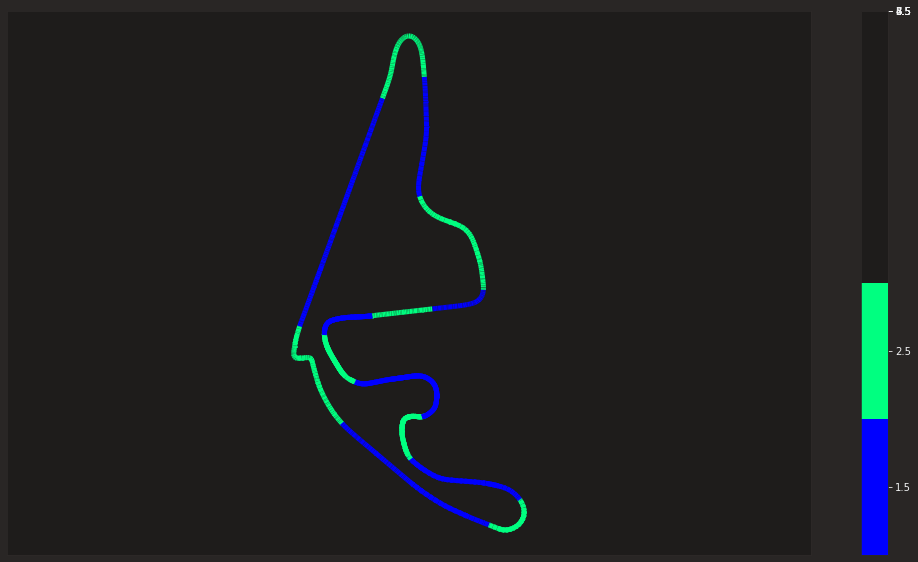

In [223]:

x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(['VER', 'HAM'])

plt.savefig(f"2021_ver_ham_q.png", dpi=300)

plt.show()

In [224]:
abu_dhabi_race.load();
laps_r = abu_dhabi_race.laps
laps_r.head() #data laps

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7']


,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:54.885000,33,NaT,1,0 days 00:23:01.492000,NaT,NaT,0 days 00:00:38.428000,0 days 00:00:33.563000,NaT,0 days 01:03:21.366000,0 days 01:03:54.999000,290.0,299.0,215.0,318.0,False,SOFT,4.0,False,1,0 days 01:02:21.871000,Red Bull Racing,VER,1,False,2021-12-12 13:03:21.881
1,0 days 01:05:23.988000,33,0 days 00:01:29.103000,2,NaT,NaT,0 days 00:00:18.116000,0 days 00:00:38.026000,0 days 00:00:32.961000,0 days 01:04:13.001000,0 days 01:04:51.027000,0 days 01:05:23.988000,284.0,300.0,213.0,302.0,False,SOFT,5.0,False,1,0 days 01:03:54.885000,Red Bull Racing,VER,1,True,2021-12-12 13:04:54.895
2,0 days 01:06:52.815000,33,0 days 00:01:28.827000,3,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.043000,0 days 00:00:32.785000,0 days 01:05:41.987000,0 days 01:06:20.030000,0 days 01:06:52.815000,286.0,300.0,212.0,301.0,False,SOFT,6.0,False,1,0 days 01:05:23.988000,Red Bull Racing,VER,1,True,2021-12-12 13:06:23.998
3,0 days 01:08:21.841000,33,0 days 00:01:29.026000,4,NaT,NaT,0 days 00:00:18.019000,0 days 00:00:38.125000,0 days 00:00:32.882000,0 days 01:07:10.834000,0 days 01:07:48.959000,0 days 01:08:21.841000,284.0,299.0,214.0,303.0,False,SOFT,7.0,False,1,0 days 01:06:52.815000,Red Bull Racing,VER,1,True,2021-12-12 13:07:52.825
4,0 days 01:09:50.559000,33,0 days 00:01:28.718000,5,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.083000,0 days 00:00:32.636000,0 days 01:08:39.840000,0 days 01:09:17.923000,0 days 01:09:50.559000,285.0,300.0,215.0,303.0,False,SOFT,8.0,False,1,0 days 01:08:21.841000,Red Bull Racing,VER,1,True,2021-12-12 13:09:21.851


core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7']


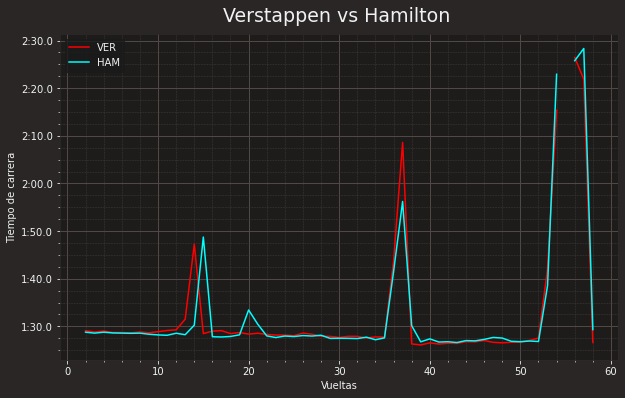

In [268]:
#comparación de vueltas entre VER Y HAM
laps = abu_dhabi_race.load_laps(with_telemetry=True)
ver = laps.pick_driver('VER')
ham = laps.pick_driver('HAM')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ver['LapNumber'], ver['LapTime'], color='red')
ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan')
ax.set_title("Verstappen vs Hamilton ")
ax.set_xlabel("Vueltas")
ax.set_ylabel("Tiempo de carrera")
plt.legend(['VER','HAM'])

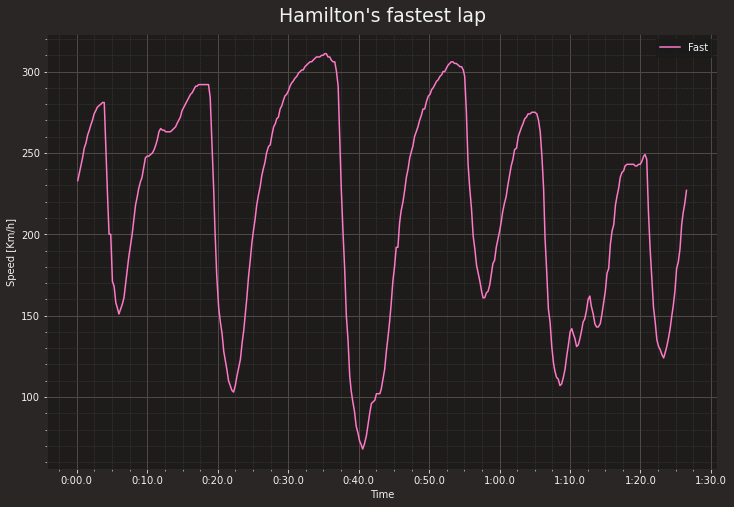

In [226]:
#vuelta más rápida de halmiton
ham_fastest_lap = laps_r.pick_driver('HAM').pick_fastest()
ham_car_data = ham_fastest_lap.get_car_data()
t = ham_car_data['Time']
velocity = ham_car_data['Speed']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velocity, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Hamilton's fastest lap")
ax.legend()

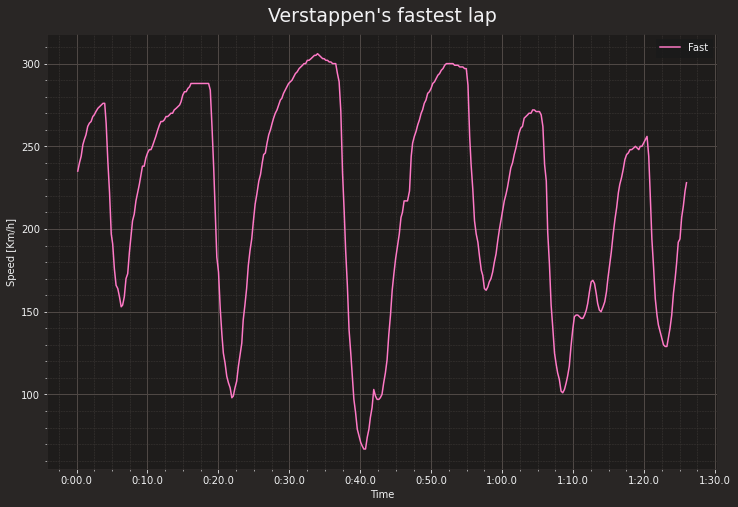

In [227]:
#Vuelta más rápida de Verstappen
ver_fastest_lap = laps_r.pick_driver('VER').pick_fastest()
ver_car_data = ver_fastest_lap.get_car_data()
t = ver_car_data['Time']
velocity = ver_car_data['Speed']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velocity, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Verstappen's fastest lap")
ax.legend()

In [228]:
# Desarrollo de la temporada 2021

In [229]:
# Load the session data
race = ff1.get_session(2021, 'Abu Dhabi', 'R')

In [230]:
laps = race.load_laps(with_telemetry=True) #coges los datos de telemetría

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7']


In [236]:
laps_ham = laps.pick_driver('HAM')
laps_ver = laps.pick_driver('VER')

In [237]:
laps_ham = laps_ham.loc[laps_ham['Stint'] == 1]
laps_ver = laps_ver.loc[laps_ver['Stint'] == 1]

In [238]:
laps_ham['RaceLapNumber'] = laps_ham['LapNumber'] - 1 #se resta 1 porque la primera vuelta es warm up
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] - 1

In [239]:
#como de cerca estaba verstappen de ham
full_distance_ver_ham = pd.DataFrame()
summarized_distance_ver_ham = pd.DataFrame()

In [240]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    
    # Only run this loop when driver ahead is HAM, otherwise we compare wrong distance gaps
    telemetry = telemetry.loc[telemetry['DriverAhead'] == "3"]
    
    if len(telemetry) != 0:
        # Full distance
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1

        full_distance_ver_ham = full_distance_ver_ham.append(lap_telemetry)

        # Average / median distance
        distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
        distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])

        summarized_distance_ver_ham = summarized_distance_ver_ham.append({
            'Lap': lap[0] + 1,
            'Mean': distance_mean,
            'Median': distance_median
        }, ignore_index = True)

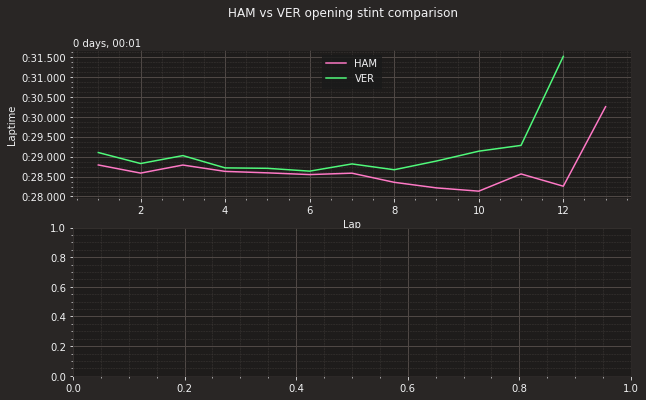

In [269]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots(2)
fig.suptitle("HAM vs VER opening stint comparison")

ax[0].plot(laps_ham['RaceLapNumber'], laps_ham['LapTime'], label='HAM')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label='VER')
ax[0].set(ylabel='Laptime', xlabel='Lap')
ax[0].legend(loc="upper center")



plt.show()

In [267]:
laps_r.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:54.885000,33,NaT,1,0 days 00:23:01.492000,NaT,NaT,0 days 00:00:38.428000,0 days 00:00:33.563000,NaT,0 days 01:03:21.366000,0 days 01:03:54.999000,290.0,299.0,215.0,318.0,False,SOFT,4.0,False,1,0 days 01:02:21.871000,Red Bull Racing,VER,1,False,2021-12-12 13:03:21.881
1,0 days 01:05:23.988000,33,0 days 00:01:29.103000,2,NaT,NaT,0 days 00:00:18.116000,0 days 00:00:38.026000,0 days 00:00:32.961000,0 days 01:04:13.001000,0 days 01:04:51.027000,0 days 01:05:23.988000,284.0,300.0,213.0,302.0,False,SOFT,5.0,False,1,0 days 01:03:54.885000,Red Bull Racing,VER,1,True,2021-12-12 13:04:54.895
2,0 days 01:06:52.815000,33,0 days 00:01:28.827000,3,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.043000,0 days 00:00:32.785000,0 days 01:05:41.987000,0 days 01:06:20.030000,0 days 01:06:52.815000,286.0,300.0,212.0,301.0,False,SOFT,6.0,False,1,0 days 01:05:23.988000,Red Bull Racing,VER,1,True,2021-12-12 13:06:23.998
3,0 days 01:08:21.841000,33,0 days 00:01:29.026000,4,NaT,NaT,0 days 00:00:18.019000,0 days 00:00:38.125000,0 days 00:00:32.882000,0 days 01:07:10.834000,0 days 01:07:48.959000,0 days 01:08:21.841000,284.0,299.0,214.0,303.0,False,SOFT,7.0,False,1,0 days 01:06:52.815000,Red Bull Racing,VER,1,True,2021-12-12 13:07:52.825
4,0 days 01:09:50.559000,33,0 days 00:01:28.718000,5,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.083000,0 days 00:00:32.636000,0 days 01:08:39.840000,0 days 01:09:17.923000,0 days 01:09:50.559000,285.0,300.0,215.0,303.0,False,SOFT,8.0,False,1,0 days 01:08:21.841000,Red Bull Racing,VER,1,True,2021-12-12 13:09:21.851


In [270]:
#calculamos la superposición de trazas de velocidad, frenos, y aceleración de ambos pilotos en la última vuelta

In [274]:
#Seleccionamos la última vuelta de los pilotos
ver_lap = laps_r.pick_driver('VER')
ham_lap = laps_r.pick_driver('HAM')

In [275]:
#Nos qudamos con la última vuelta de ambos pilotos
ham_lastlap=ham_lap[ham_lap.LapNumber==58]
ver_lastlap=ver_lap[ver_lap.LapNumber==58]

In [276]:
print(f'Tiempo de la útima vuelta Hamilton: ',ham_lastlap.LapTime)
print(f'Tiempo de la útima vuelta Verstappen: ',ver_lastlap.LapTime)

Tiempo de la útima vuelta Hamilton:  115   0 days 00:01:29.330000
Name: LapTime, dtype: timedelta64[ns]
Tiempo de la útima vuelta Verstappen:  57   0 days 00:01:26.618000
Name: LapTime, dtype: timedelta64[ns]


In [277]:
#A continuación, obtenemos los datos de telemetría de cada vuelta. 
#Agregamos una columna "Distancia" al marco de datos de telemetría, ya que esto facilita la comparación de vueltas.
ver_tel = ver_lastlap.get_car_data().add_distance()
ham_tel = ham_lastlap.get_car_data().add_distance()

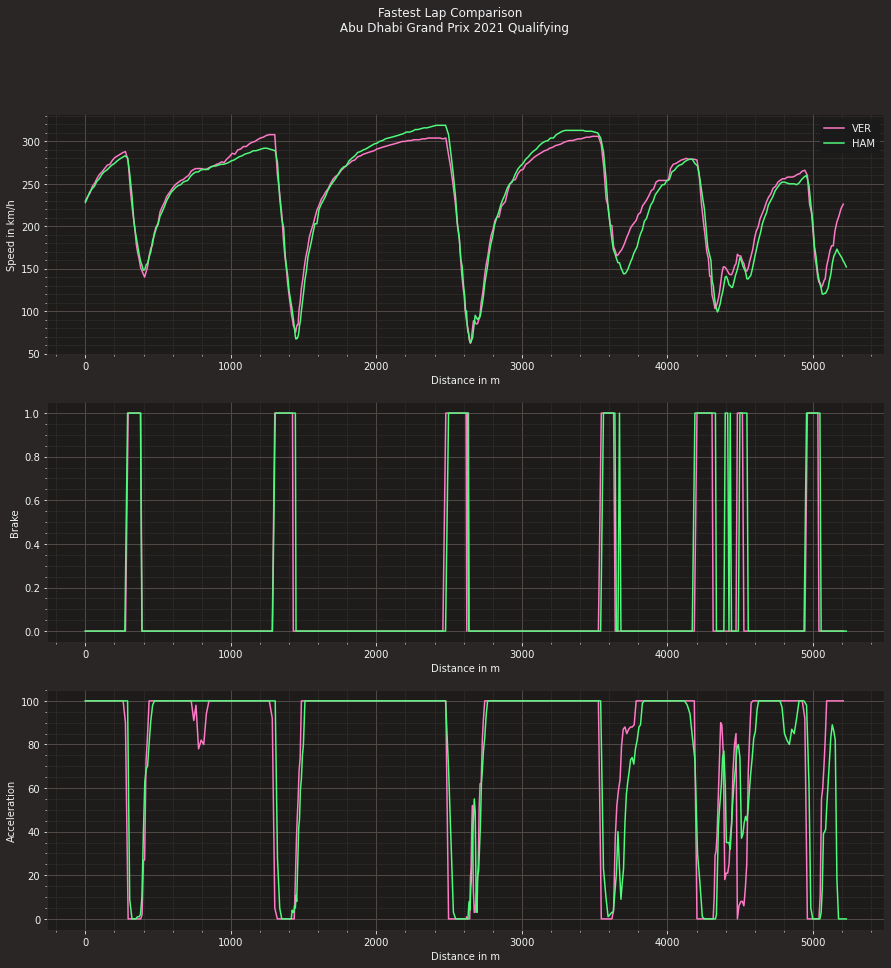

In [278]:
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(3)

fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], label='VER')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], label='HAM')
ax[0].set_xlabel('Distance in m')
ax[0].set_ylabel('Speed in km/h')
ax[0].legend()

ax[1].plot(ver_tel['Distance'], ver_tel['Brake'], label='VER')
ax[1].plot(ham_tel['Distance'], ham_tel['Brake'], label='HAM')
ax[1].set_xlabel('Distance in m')
ax[1].set_ylabel('Brake')

ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], label='VER')
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], label='HAM')
ax[2].set_xlabel('Distance in m')
ax[2].set(ylabel='Acceleration')

plt.suptitle(f"Fastest Lap Comparison \n "
             f"{race.weekend.name} {race.weekend.year} Qualifying")

plt.show()